# DACON 컴퓨터 비전 학습 경진대회
### 2020.08.03 ~ 2020.09.14 17:59

## Python import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import time

## Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

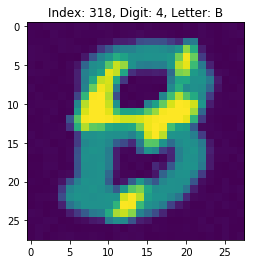

In [3]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [4]:
letter = train['letter']
i=0
print(ord(letter[i])-65)
print(letter)
len(letter.unique())

11
0       L
1       B
2       L
3       D
4       A
5       C
6       Q
7       M
8       F
9       J
10      H
11      N
12      C
13      X
14      H
15      I
16      R
17      A
18      J
19      C
20      V
21      Y
22      T
23      S
24      U
25      M
26      F
27      P
28      H
29      D
       ..
2018    R
2019    N
2020    H
2021    Z
2022    D
2023    L
2024    X
2025    I
2026    Y
2027    U
2028    F
2029    N
2030    S
2031    Y
2032    I
2033    D
2034    T
2035    G
2036    M
2037    F
2038    L
2039    Q
2040    N
2041    Q
2042    M
2043    V
2044    L
2045    A
2046    Z
2047    Z
Name: letter, Length: 2048, dtype: object


26

In [5]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

digit = train['digit']
letter = train['letter']

y_train_digit = np.zeros((len(digit), len(digit.unique())))
for i, d in enumerate(digit):
    y_train_digit[i, d] = 1

y_train_letter = np.zeros((len(letter), len(letter.unique())))
for i, l in enumerate(letter):
    y_train_letter[i, ord(l)-65] = 1

In [6]:
x_val = x_train[-int(len(x_train)*0.2):]
y_val_digit = y_train_digit[-int(len(y_train_digit)*0.2):]
y_val_letter = y_train_letter[-int(len(y_train_letter)*0.2):]

x_train = x_train[:-int(len(x_train)*0.2)]
y_train_digit = y_train_digit[:-int(len(y_train_digit)*0.2)]
y_train_letter = y_train_letter[:-int(len(y_train_letter)*0.2)]

In [7]:
print(str(x_val.shape))
print(str(y_val_digit.shape))
print(str(y_val_letter.shape))

print(str(x_train.shape))
print(str(y_train_digit.shape))
print(str(y_train_letter.shape))

(409, 28, 28, 1)
(409, 10)
(409, 26)
(1639, 28, 28, 1)
(1639, 10)
(1639, 26)


In [35]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128,kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    dropOut = tf.keras.layers.Dropout(0.5)(pool)
    

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    dropOut = tf.keras.layers.Dropout(0.5)(pool)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)
    dropOut = tf.keras.layers.Dropout(0.25)(dense)
    
    digit = tf.keras.layers.Dense(10, activation='softmax')(dropOut)
    letter = tf.keras.layers.Dense(26, activation='softmax')(dropOut)

    model = tf.keras.models.Model(inputs=inputs, outputs=[digit, letter])

    return model
    
model = create_cnn_model(x_train)

In [53]:
num_classes = 36

model = Sequential([
  layers.Input(x_train.shape[1:]),

  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
num_classes = 36

model = Sequential([

  layers.Input(x_train.shape[1:]),
  
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [63]:
datagen = keras.preprocessing.image.MultiOutputDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
    )

AttributeError: module 'tensorflow_core.python.keras.api._v2.keras.preprocessing.image' has no attribute 'MultiOutputDataGenerator'

In [52]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.000001),
    metrics=['accuracy']
    )

In [56]:
del model

In [37]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 28, 28, 1)    4           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 128)  3328        batch_normalization_20[0][0]     
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 28, 28, 128)  512         conv2d_16[0][0]                  
____________________________________________________________________________________________

In [38]:
MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + str('MULTI_OUT_')+'{epoch:02d}-{val_dense_13_accuracy:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_dense_10_accuracy', verbose=1, save_best_only = True)

In [53]:
epochs=10
history = model.fit(x_train, {'dense_13': y_train_digit, 'dense_14': y_train_letter}, validation_data=(x_val, [y_val_digit, y_val_letter]), epochs=epochs, callbacks=[cb_checkpoint])

Train on 1639 samples, validate on 409 samples
Epoch 1/20
1632/1639 [============================>.] - ETA: 0s - loss: 0.0062 - dense_13_loss: 0.0038 - dense_14_loss: 0.0024 - dense_13_accuracy: 0.9994 - dense_14_accuracy: 1.0000
Epoch 00001: val_dense_13_accuracy did not improve from 0.65037
1639/1639 [==============================] - 4s 2ms/sample - loss: 0.0064 - dense_13_loss: 0.0039 - dense_14_loss: 0.0032 - dense_13_accuracy: 0.9994 - dense_14_accuracy: 1.0000 - val_loss: 2.5799 - val_dense_13_loss: 1.5948 - val_dense_14_loss: 0.9882 - val_dense_13_accuracy: 0.6333 - val_dense_14_accuracy: 0.7384
Epoch 2/20
1600/1639 [============================>.] - ETA: 0s - loss: 0.0068 - dense_13_loss: 0.0034 - dense_14_loss: 0.0034 - dense_13_accuracy: 1.0000 - dense_14_accuracy: 1.0000
Epoch 00002: val_dense_13_accuracy did not improve from 0.65037
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.0068 - dense_13_loss: 0.0034 - dense_14_loss: 0.0035 - dense_13_accuracy:

In [61]:
epochs=25
history = model.fit_generator(
    datagen.flow(x_train, {'dense_1': y_train_digit, 'dense_2': y_train_letter}, batch_size=32),
    steps_per_epoch=len(x_train) / 32,
    validation_data=(x_val, [y_val_digit, y_val_letter]), 
    epochs = epochs,
    callbacks=[cb_checkpoint])

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (1639, 28, 28, 1), y.shape = ()

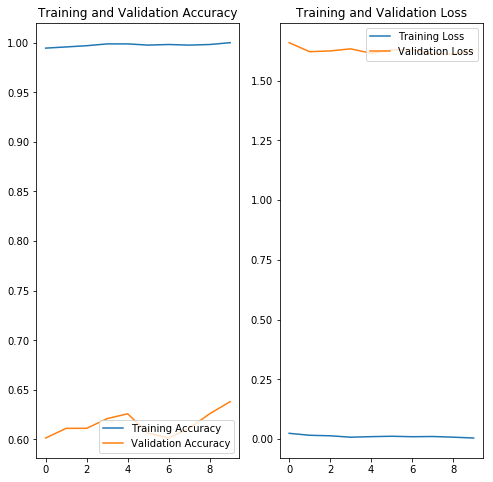

In [45]:
acc = history.history['dense_13_accuracy']
val_acc = history.history['val_dense_13_accuracy']

loss=history.history['dense_13_loss']
val_loss=history.history['val_dense_13_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

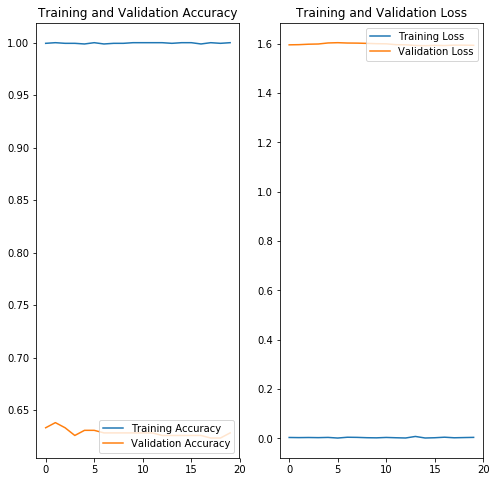

In [54]:
acc = history.history['dense_13_accuracy']
val_acc = history.history['val_dense_13_accuracy']

loss=history.history['dense_13_loss']
val_loss=history.history['val_dense_13_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict

In [76]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


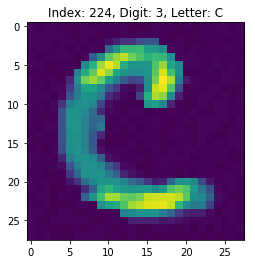

In [106]:
idx = 224

img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

prd = model.predict(img.reshape(-1,28,28,1))
print(prd)
plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [77]:
prd=model.predict(x_test)
print(prd)

[[4.1878542e-05 1.2676001e-05 8.4101310e-04 ... 3.2639264e-07
  2.5946755e-04 1.4352553e-06]
 [3.8346637e-02 7.7407494e-09 1.1168981e-08 ... 4.7943868e-11
  2.8725939e-12 1.0416679e-07]
 [1.1603075e-06 8.2216403e-03 3.8493325e-03 ... 2.6628823e-07
  3.4305714e-08 2.1399144e-05]
 ...
 [6.1335504e-07 1.0243067e-05 1.4767365e-07 ... 6.4021468e-09
  8.0732640e-08 2.6453392e-07]
 [6.9842681e-06 6.8352264e-03 3.5500347e-05 ... 9.2199400e-05
  5.3150725e-06 1.3112351e-07]
 [2.1433704e-01 8.0731860e-07 1.1199270e-02 ... 4.4437565e-09
  1.4375134e-08 4.3029272e-06]]


In [ ]:
model = keras.models.load_model('./model/01-0.7751.hdf5')

In [ ]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

In [ ]:
submission.to_csv('08241530(dropout0.25+data_aug).csv', index=False)